In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

2022-11-06 15:22:24.504259: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = pd.read_csv('datasets/tesla.csv')
data = data.dropna()
train, test = train_test_split(data, test_size=0.1, shuffle=False)
train.shape, test.shape

((1973, 7), (220, 7))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [5]:
trainData = train.iloc[:,4:5].values
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1973, 1)

In [6]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [8]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [9]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 9s - loss: 0.0115 - 9s/epoch - 261ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0024 - 4s/epoch - 123ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0017 - 4s/epoch - 122ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0038 - 4s/epoch - 122ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0017 - 4s/epoch - 122ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0019 - 4s/epoch - 124ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0014 - 4s/epoch - 123ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0015 - 4s/epoch - 123ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0013 - 4s/epoch - 122ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0015 - 4s/epoch - 125ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0014 - 4s/epoch - 124ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0020 - 4s/epoch - 123ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0017 - 4s/epoch - 127ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0012 - 4s/epoch - 124ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0012 - 4s/epoch - 126ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0028 - 4s/epoch - 123ms/step
Epoch 17/20
35/35

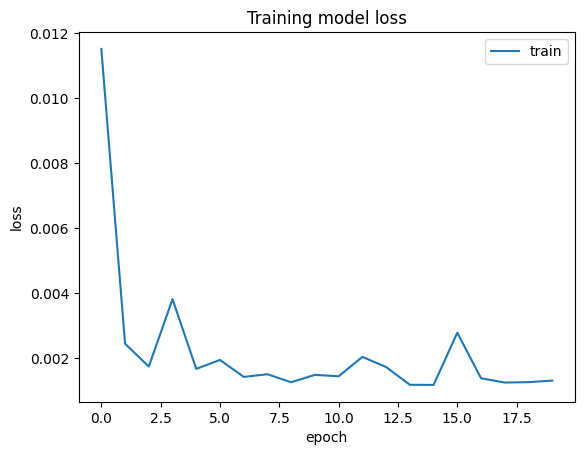

In [10]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [11]:
testData = test
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(160, 60, 1)

In [12]:
y_pred = model.predict(X_test)
y_pred.shape

5/5 [==============================] - 1s 36ms/step


(160, 1)

In [13]:
predicted_price = sc.inverse_transform(y_pred)
predicted_price

array([[276.62903],
       [275.83286],
       [274.77148],
       [273.40005],
       [271.83014],
       [270.24707],
       [269.41354],
       [269.8635 ],
       [271.671  ],
       [275.05545],
       [279.81293],
       [285.25092],
       [290.68008],
       [295.57095],
       [299.48965],
       [302.12045],
       [303.35248],
       [302.93292],
       [300.90863],
       [297.73645],
       [293.96915],
       [290.098  ],
       [286.53705],
       [283.51865],
       [281.056  ],
       [279.00845],
       [277.22012],
       [275.5738 ],
       [273.86502],
       [271.8862 ],
       [269.57117],
       [266.7713 ],
       [263.74692],
       [260.75726],
       [258.16174],
       [256.20633],
       [255.06358],
       [254.75578],
       [255.05696],
       [255.86679],
       [257.06824],
       [258.53195],
       [260.12598],
       [261.739  ],
       [263.37958],
       [265.02124],
       [266.0861 ],
       [266.69363],
       [266.9789 ],
       [266.99786],


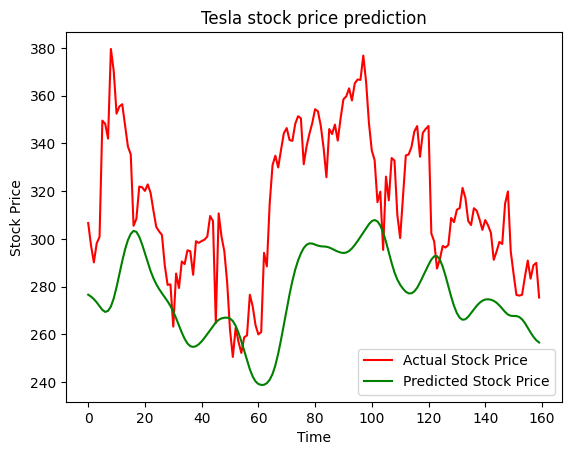

In [14]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Tesla stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
model.save('tesla.hdf5')